# Predict Housing Prices (Basic)

Data Set hosing.csv 

The descriptions of the variables are below.

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block 
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars) 
10. oceanProximity: Location of the house w.r.t ocean/sea 

# Import library and clean data

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv("housing.csv")
df = df.drop(['ocean_proximity'], axis=1)
df.head(3)
df['total_bedrooms'].isnull().any()
#df['total_bedrooms'].describe()
#df['total_bedrooms'].isnull().sum()
mean = df['total_bedrooms'].mean()
df['total_bedrooms'].fillna(mean,inplace=True)
df['total_bedrooms'].isnull().any()
#df['total_bedrooms'].describe()
df.isnull().any()
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0


In [29]:
# Split data into train set (70%) and test set (30%)

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:8], df['median_house_value'], test_size=0.3, 
                                                    random_state = 446)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14448, 8) (6192, 8) (14448,) (6192,)


In [6]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Linear Regression

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
print("intercept : ", model.intercept_)
coef = pd.DataFrame(list(zip(df.iloc[:,:8], model.coef_)))
coef.columns = ['features', 'coef']
coef

intercept :  -3540544.020236356


,features,coef
0,longitude,-42388.997119
1,latitude,-42434.419383
2,housing_median_age,1084.745115
3,total_rooms,-5.049680
4,total_bedrooms,71.125947
5,population,-45.283333
6,households,95.127687
7,median_income,39184.354073


Fitted model

Median house value = -3,540,544 - 42,389(longitude) - 42,434(latitude) + 1085(housing median age) - 5(total rooms) + 71(total bedrooms) - 45(population) + 95(households) + 39,184(median income)

#################################################################################################################

Interpret the coefficients for “housing_median_age” and “median_income”

Interpret housing median age : 

Housing median age has positive impacts on median house value, implying that the higher housing median age is, the higher median house value will be. 

Coef = 1085 => As the housing median age increase 1 unit, the median house value will be increased by 1085 unit(US Dollars), holding the other features constant.



Interpret median_income : 

Median income has positive impacts on median house value, implying that the higher median income is, the higher median house value will be. 

Coef = 39184 => As the median income increase 1 unit(tens of thousands of US Dollars), the median house value will be increased by 39184 unit(US Dollars), holding the other features constant. 

Convert to the same unit(US Dollars) : As the median income increase 1 unit(US Dollars), the median house value will be increased by 391.84 unit(US Dollars), holding the other features constant.


#################################################################################################################

Predict a housing price for a house with longtitude=-200, latitude=40,
housing_median_age=10, total_rooms=1500, total_bedrooms = 400, population=1000,
households = 500, and median_income = 3.5 

In [33]:
new_data = pd.DataFrame({'longtitude':[-200], 'latitude':[40],'housing_median_age':[10],
                         'total_rooms':[1500],'total_bedrooms ':[400], 'population':[1000],
                        'households':[500],'median_income':[3.5]})


new_data
print(model.predict(new_data))

[3411027.68695518]


A housing median price for a house with longtitude=-200, latitude=40,
housing_median_age=10, total_rooms=1500, total_bedrooms = 400, population=1000,
households = 500, and median_income = 3.5 is 3411028 US dollars

#################################################################################################################

Evaluate a linear regression model performance

In [34]:
y_pred = model.predict(X_test)
rmse_test = mean_squared_error(y_pred, y_test)**0.5
print("Linear model RMSE (test) :" + str(rmse_test))
print("R2 score (test) :" + str(r2_score(y_pred, y_test)))

Linear model RMSE (test) :71418.93039796817
R2 score (test) :0.41721926120347974


# Random Forest

In [35]:
forest_model = RandomForestRegressor(random_state=112)
forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=112)

a. Predict a housing price for a house with longtitude=-200, latitude=40,
housing_median_age=10, total_rooms=1500, total_bedrooms = 400, population=1000,
households = 500, and median_income = 3.5 \

In [36]:
forest_model.predict(new_data)

array([113665.])

A housing median price for a house with longtitude=-200, latitude=40,
housing_median_age=10, total_rooms=1500, total_bedrooms = 400, population=1000,
households = 500, and median_income = 3.5 is 113665 US dollars

#################################################################################################################

Evaluate model performance and compare the model’s performance with a linear
regression model

In [13]:
y_forest_pred = forest_model.predict(X_test)
rmse_forest_test = mean_squared_error(y_forest_pred, y_test)**0.5
print("Random Forest model RMSE (test) :" + str(rmse_forest_test))
print("R2 score (test) :" + str(r2_score(y_forest_pred, y_test)))

Random Forest model RMSE (test) :50200.918804000416
R2 score (test) :0.7614661750168823


Random Forest model RMSE is 50200 US Dollars and R2 is 76.14%

Linear regression model RMSE is 71418 US Dollars and R2 is 41.72%

Random Forest model has better performance than Linear regression model due to lower RMSE and higher R2 score.


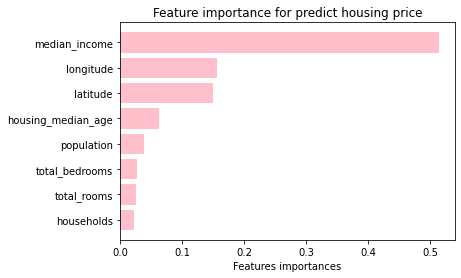

In [83]:
forest_model.feature_importances_
sort  = forest_model.feature_importances_.argsort()
plt.barh(X_train.columns[sort], forest_model.feature_importances_[sort],color='Pink')
plt.xlabel("Features importances")
plt.title("Feature importance for predict housing price")
#plt.grid()
plt.show()

# Adding more features

Create more features to improve model’s performance

In [14]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0


In [84]:
#more features
X_train['houses/pop'] = X_train['households']/X_train['population']
X_test['houses/pop'] = X_test['households']/X_test['population']

X_train['bedrooms/pop'] = X_train['total_bedrooms']/X_train['population']
X_test['bedrooms/pop'] = X_test['total_bedrooms']/X_test['population']

X_train['non_bedrooms'] = X_train['total_rooms']/X_train['total_bedrooms']
X_test['non_bedrooms'] = X_test['total_rooms']/X_test['total_bedrooms']

X_train['rooms/houses'] = X_train['total_rooms']/X_train['households']
X_test['rooms/houses'] = X_test['total_rooms']/X_test['households']

X_train['bedrooms/houses'] = X_train['total_bedrooms']/X_train['households']
X_test['bedrooms/houses'] = X_test['total_bedrooms']/X_test['households']

#X_train['non-bedrooms/houses'] = X_train['non_bedroom']/X_train['households']
#X_test['non-bedrooms/houses'] = X_test['non_bedroom']/X_test['households']
#X_train.corr()

X_train.shape, X_test.shape, y_train.shape, y_test.shape
X_train.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,houses/pop,bedrooms/pop,non_bedrooms,rooms/houses,bedrooms/houses
16980,-122.30,37.57,36.0,2406.0,436.0,1189.0,403.0,4.7917,0.338940,0.366695,5.518349,5.970223,1.081886
17192,-119.77,34.44,24.0,5652.0,1313.0,2312.0,1294.0,2.4717,0.559689,0.567907,4.304646,4.367852,1.014683
18454,-121.78,37.23,18.0,1747.0,317.0,1055.0,285.0,5.8980,0.270142,0.300474,5.511041,6.129825,1.112281


In [38]:
# for random forest model
forest_model2 = RandomForestRegressor(random_state=112)
forest_model2.fit(X_train, y_train)

y_forest_pred2 = forest_model2.predict(X_test)
rmse_forest_test2 = mean_squared_error(y_forest_pred2, y_test)**0.5
print("Random Forest model RMSE (test) :" + str(rmse_forest_test2))
print("R2 score (test) :" + str(r2_score(y_forest_pred2, y_test)))

Random Forest model RMSE (test) :51990.31076677708
R2 score (test) :0.739345856866303


In [39]:
# for linear regression model
model2 = LinearRegression()
model2.fit(X_train, y_train)

#print("intercept : ", model2.intercept_)
coef = pd.DataFrame(list(zip(X_train, model.coef_)))
coef.columns = ['features', 'coef']
coef

y_pred2 = model2.predict(X_test)
rmse_test2 = mean_squared_error(y_pred2, y_test)**0.5
print("Linear model RMSE (test) :" + str(rmse_test2))
print("R2 score (test) :" + str(r2_score(y_pred2, y_test)))

Linear model RMSE (test) :67500.98120074389
R2 score (test) :0.500568295868998


Adding more features : houses/pop, bedrooms/pop, non-bedrooms, rooms/houses, bedrooms/houses

*Random forest model*

before adding => RMSE=50200, R2 = 76.14% \
after adding  => RMSE=51990, R2 = 73.93% 

RMSE before adding features is lower than RMSE after adding more features. \
R2 before adding features is higher than R2 after adding more features. \
Adding more features decreases Random forest model performance.





*Linear regression model*

before adding => RMSE=71419, R2 = 41.72% \
after adding  => RMSE=67501, R2 = 50.05% 

RMSE before adding more features is higher than RMSE after adding more features. \
R2 before adding more features is lower than R2 after adding more features. \
Adding more features increases Linear regression model performance. 

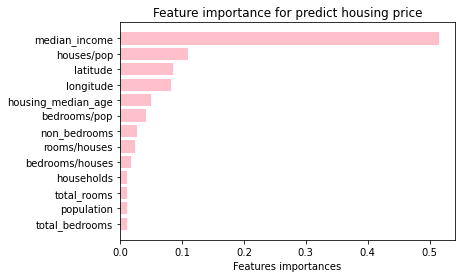

In [87]:
forest_model2.feature_importances_
sort  = forest_model2.feature_importances_.argsort()
plt.barh(X_train.columns[sort], forest_model2.feature_importances_[sort],color='Pink')
plt.xlabel("Features importances")
plt.title("Feature importance for predict housing price")
#plt.grid()
plt.show()